In [1]:
# approach is from this website: 
# https://www.pluralsight.com/guides/explore-python-libraries:-imbalanced-learn
# ADASYN takes ideas from SMOTE and builds on them. In particular, ADASYN selects 
# minority samples S so that “more difficult to classify” minority samples are 
# more likely to be selected. This allows the classifier to have more opportunity 
# to learn tough instances. The code for ADASYN is entirely analogous to that of 
# SMOTE, except you just replace the word “SMOTE” with “ADASYN”.

In [2]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# os.getcwd()

In [4]:
# os.listdir(os.getcwd())

In [5]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_nan_removed.csv")
all_param_df.shape


(31686, 357)

In [6]:
# using binary classification for logistic regression
y_class = all_param_df['suc_class']

In [7]:
y_class

0        1
1        0
2        0
3        0
4        0
        ..
31681    0
31682    0
31683    0
31684    0
31685    0
Name: suc_class, Length: 31686, dtype: int64

In [8]:
# create new X parameters df
x_data = all_param_df.drop(['appid','maxccu','success_class','suc_class','followers','positive_y', 'negative_y', 'totaltags', 'recommendations', 'positive_x', 'negative_x']  , axis=1)

In [9]:
x_data.shape

(31686, 346)

In [10]:
#label encode the developer name

In [11]:
x_data['developer']=x_data['developer'].astype('category')

In [12]:
x_data['developer']=x_data['developer'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,Valve,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,Valve,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,Valve,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,Valve,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,Valve,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#label encode the publisher name

In [14]:
x_data['publisher']=x_data['publisher'].astype('category')

In [15]:
x_data['publisher']=x_data['publisher'].cat.codes
x_data.head()

,metascore,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,88,18255,15348,999,90,602,5337,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,18255,15348,499,90,0,738,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,18255,15348,499,90,14,156,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,18255,15348,499,90,0,626,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6704,15348,499,90,0,312,109,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# ADASYN selects "more difficult to classify" minority samples for better training the classifier

from imblearn.over_sampling import ADASYN

X_adasyn, y_adasyn = ADASYN().fit_sample(x_data, y_class)

In [17]:
# see classes are balanced
X_adasyn = pd.DataFrame(X_adasyn)
y_adasyn = pd.DataFrame(y_adasyn)
y_adasyn.iloc[:, 0].value_counts()

0    30883
1    30637
Name: suc_class, dtype: int64

In [18]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, random_state=5)

In [19]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [20]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [22]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [23]:
# Instantiate and Train model
y = y_train
X = X_train_scaled

clf_1 = LogisticRegression(max_iter=1000).fit(X, y)

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_1.score(X, y)}")
print(f"Testing Data Score: {clf_1.score(X_test_scaled, y_test)}")

Training Data Score: 0.8104031209362809
Testing Data Score: 0.8145643693107932


In [25]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_1.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      7678
           1       0.87      0.74      0.80      7702

    accuracy                           0.81     15380
   macro avg       0.82      0.81      0.81     15380
weighted avg       0.82      0.81      0.81     15380



In [26]:
# thinking about baseline results:
# Support is balanced - ~9700 of 1's and 0's
# Percision: for no success: 73%, better for successful games: 90%
# Percision= % of labeling an outcome that is correct from all the labels of that outcome
# labeled cancer correctly from all labeled cancer
# Recall: Fraction of positives found, 93% for 0, 65% for 1
# Recall - % of true label found from all true cases of the label
# how many of the cancer cases did you find
# f1 score: 79% due to overfitting on failure cases

<AxesSubplot:>

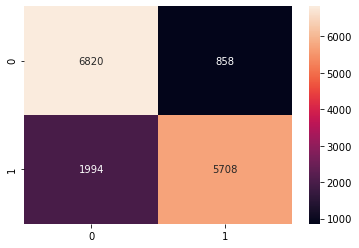

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_1.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [28]:
# Co-efficient importance

print(x_data.columns.shape, clf_1.coef_.shape)
new_col = np.reshape(clf_1.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
141,tagsingleplayer,15.734909
11,tagrpg,15.678486
62,tagopenworld,12.776134
7,tagadventure,11.227466
14,tagearlyaccess,10.973744
12,tagmassivelymultiplayer,10.574229
16,tagsimulation,9.685029
87,tagmmorpg,9.067416
342,tagclicker,8.183325
6,tagaction,7.922727


In [29]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = clf_1.predict_proba(X_test)
prob_y_2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [30]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [31]:
# Print AUROC of SMOTE model
# ROC is a probability curve and AUC represents the degree or measure of separability. 
# It tells how much the model is capable of distinguishing between classes. 
# Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
print( roc_auc_score(y_test, prob_y_2) )

0.5876414849875767


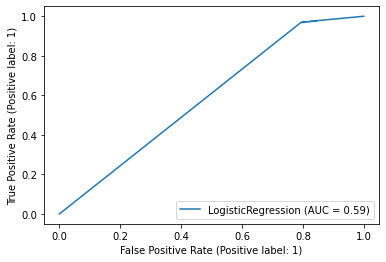

In [32]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_1, X_test, y_test)  
plt.show()